In [996]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import uncrater as uc
from uncrater.utils import cordic2rad, rad2cordic, cordic_add
alpha_to_pdrift = 50e3*4096*16/102.4e6*2*np.pi*1e-6

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [997]:
import json
def read_adc(ch):
    jdata = json.load(open(f'/u/home/anze/Nov21/adc{ch}_output.json'))
    data = np.array(jdata['data'])
    data[data>8192]-=16384
    return data

ewf = [read_adc(ch+1) for ch in range(4)]

def spec(w):
    return np.abs(np.fft.rfft(w)**2)

In [1051]:
C = uc.Collection("session_calibrator/cdi_output")
Cd = uc.Collection("session_calibrator/cdi_output")
#Cx = uc.Collection("session_calibrator/cdi_output")
#C.calib_data.shape

Analyzing 50 files from session_calibrator/cdi_output.
Analyzing 50 files from session_calibrator/cdi_output.


In [1052]:
x= C.calib[0]['meta']
x.phaser_err,x.averager_err_cnt, x.process_err_cnt,x.stage3_err_cnt

((0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0),
 0)

In [1053]:
f"{x.process_err_cnt[0]:x}", x.delta_drift_cor_a, x.delta_drift_cor_b

('0', 0, 1)

In [1054]:
C.spectra[0]['meta'].adc_max

array([1369, 3315,  281,  491])

Text(0, 0.5, 'power')

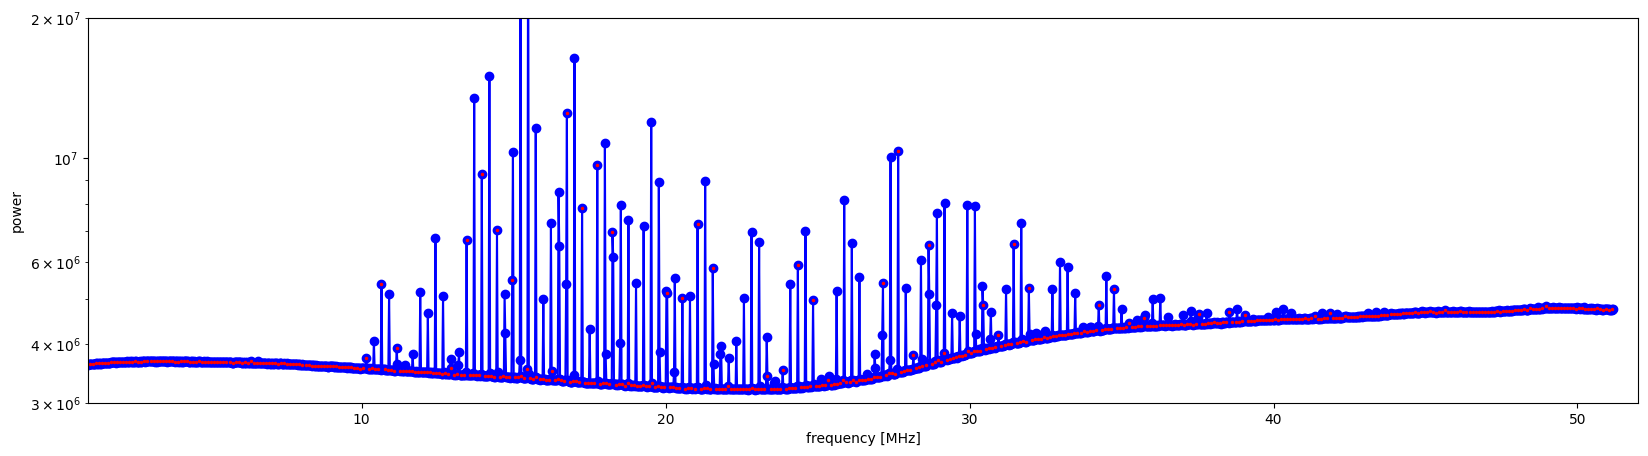

In [1055]:

plt.figure(figsize=(20,5))
f = C.spectra[2][0].frequency
s = np.mean([sp[2].data[:] for sp in C.spectra],axis=0)
plt.plot(f,s,'bo-')
plt.plot(f[2::4],s[2::4],'r.',markersize=3)
plt.xlim(1,52)
#plt.ylim(0,1e4)
#plt.ylim(3.0e6,5e6)
#plt.ylim(0.1e3,2e6)
plt.ylim(3e6,2e7)
plt.semilogy()
plt.xlabel('frequency [MHz]')
plt.ylabel('power')

Text(0, 0.5, 'power')

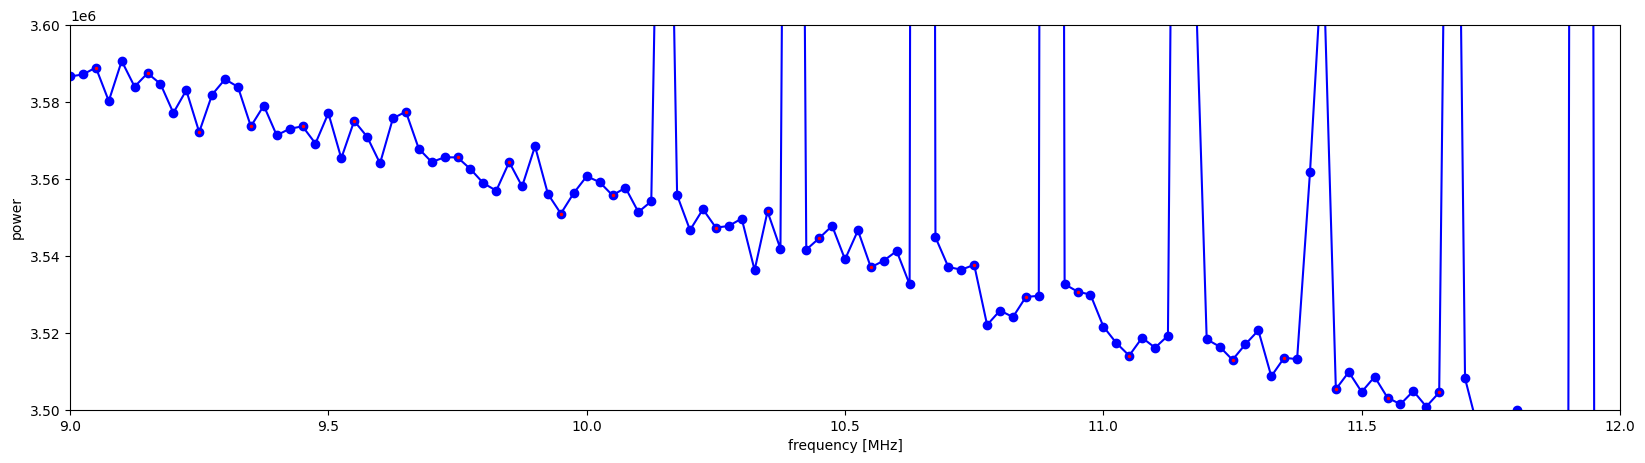

In [1056]:

plt.figure(figsize=(20,5))
f = C.spectra[2][0].frequency
s = np.mean([sp[2].data[:] for sp in C.spectra],axis=0)
plt.plot(f,s,'bo-')
plt.plot(f[2::4],s[2::4],'r.',markersize=3)

#plt.ylim(0,1e4)
#plt.ylim(3.0e6,5e6)
#plt.ylim(0.1e3,2e6)
#plt.xlim(45,52)
#plt.ylim(4.65e6,4.85e6)
plt.xlim(9,12)
plt.ylim(3.5e6,3.6e6)

#plt.semilogy()
plt.xlabel('frequency [MHz]')
plt.ylabel('power')

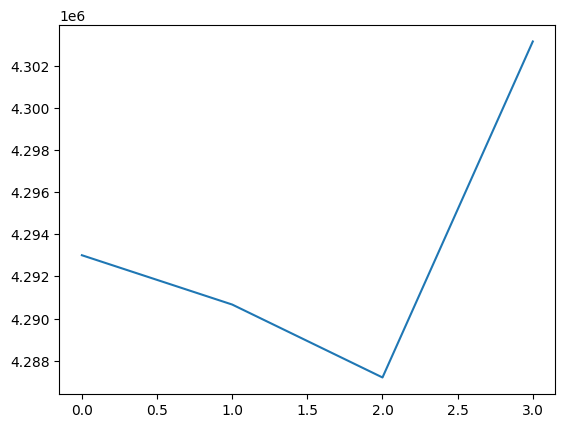

In [1057]:
plt.plot(s[900::].reshape(-1,4).mean(axis=0))

[]

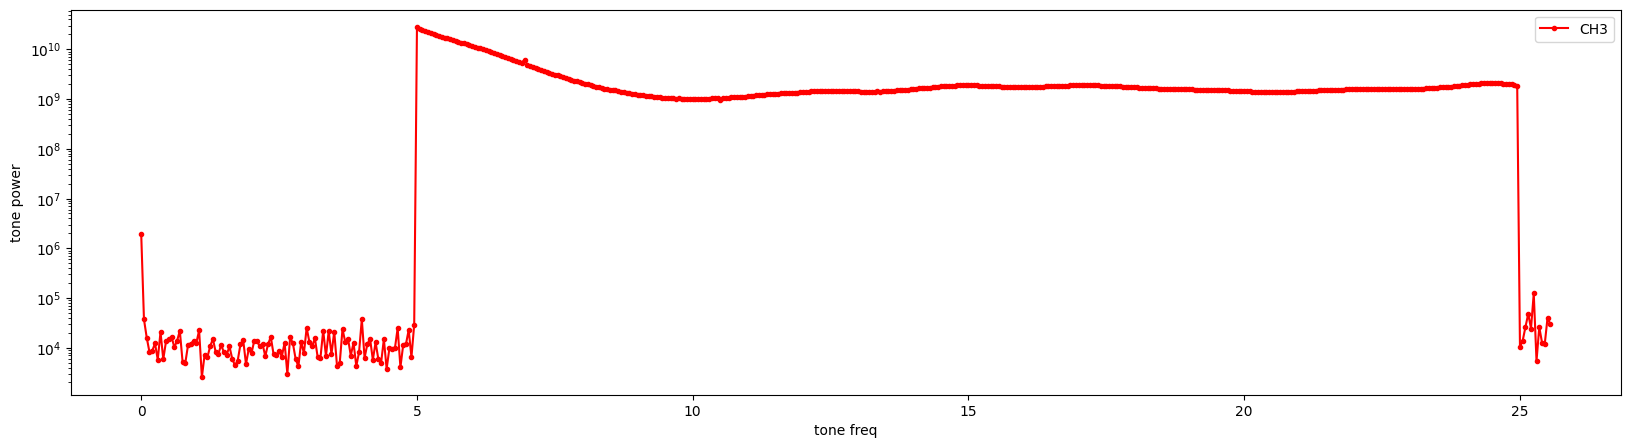

In [1058]:
plt.figure(figsize=(20,5))
tfreq=0.5*0.1*np.arange(512)
for ch in range(3,4):
    plt.plot(tfreq,np.abs(C.calib_data[ch,1:,:]**2).mean(axis=0), 'r.-',label='CH'+str(ch))
    #plt.plot(np.abs(Cx.calib_data[ch,1:,:]**1).mean(axis=0), label='CH'+str(ch))

    #plt.plot(np.abs(C.calib_data[ch,1:,100:500]**1).mean(axis=0)/np.abs(Cx.calib_data[ch,1:,100:500]**1).mean(axis=0), label='CH'+str(ch))


plt.legend()
plt.xlabel('tone freq')
plt.ylabel('tone power')
#i1= np.real(C.calib_data[2,:,400])
#i2=np.imag(C.calib_data[2,:,400])
#i3= np.real(C.calib_data[3,:,400])
#plt.plot(np.imag(C.calib_data[3,:,100]))
#plt.plot(C.calib_data[0,:,400])
#plt.plot(r3**2+i3**2)
plt.semilogy()

In [847]:
C.gNacc
#plt.imshow(cordic2rad(C.gphase[:,:16]),aspect='auto', interpolation='nearest')
#plt.plot(C.gphase[30,:16])
#plt.plot(C.gphase[60,:16])

#plt.plot(C.calib_data[0,1,:])
#plt.plot(C.calib_data[0,60,:])


array([4, 9, 9, 4, 9, 2, 2, 4, 4])

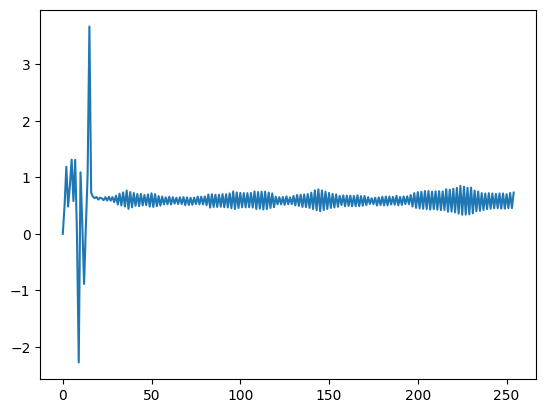

In [1034]:
plt.plot(cordic2rad(C.gphase[1:4,:255].mean(axis=0).astype(int))/alpha_to_pdrift/32)
#plt.plot(cordic2rad(C.gphase[-30:-10,:17].mean(axis=0).astype(int))/alpha_to_pdrift/32)
#plt.plot(C.gphase[-2,1:18])
#plt.plot(C.cd_fd0/C.cd_sd0)
#plt.plot(C.cd_fd1/C.cd_sd1)
#plt.plot(C.cd_fd2/C.cd_sd2)
#plt.plot(C.cd_fd3/C.cd_sd3)

#plt.plot(C.cd_fdx/C.cd_sdx)
#plt.xlim(2500,3500)
#plt.ylim(-1e-4,1e-4)

#plt
# .plot(C.cd_fdx)
#plt.xlim(3000,4000)
#plt.semilogy()


#plt.semilogy()
#C.cd_lock_ant.max()

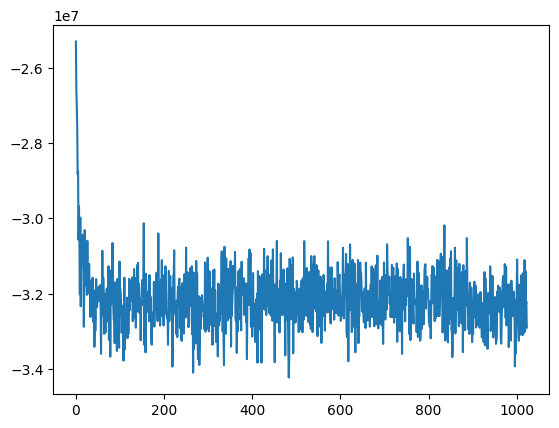

In [1035]:
plt.plot(Cd.cd_sd2)


In [682]:
#plt.plot(Cd.cd_drift, Cd.cd_powertop0,'bo')
#plt.plot(Cd.cd_drift, Cd.cd_powertop1,'ro')
#plt.plot(Cd.cd_drift, Cd.cd_powertop2,'go')
#plt.plot(Cd.cd_drift, Cd.cd_powertop3,'yo')

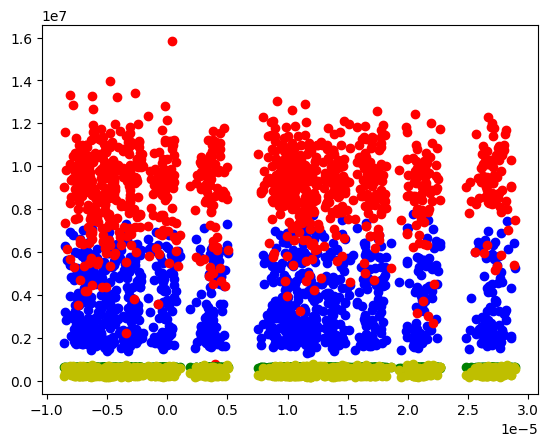

In [939]:
plt.plot(Cd.cd_drift, Cd.cd_powerbot0,'bo')
plt.plot(Cd.cd_drift, Cd.cd_powerbot1,'ro')
plt.plot(Cd.cd_drift, Cd.cd_powerbot2,'go')
plt.plot(Cd.cd_drift, Cd.cd_powerbot3,'yo')

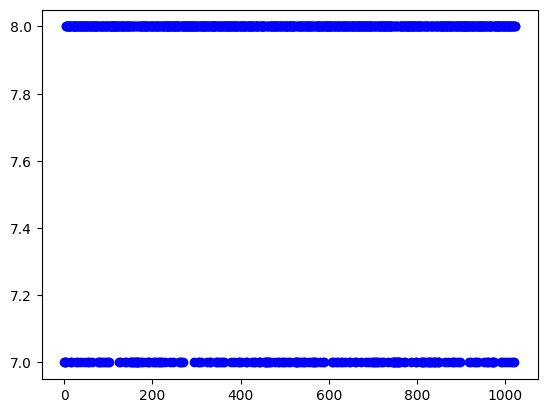

In [1036]:
#plt.plot(Cd.cd_snr0,'ro')
#plt.plot(Cd.cd_snr1,'go')
plt.plot(Cd.cd_snr2,'bo')
#plt.plot(Cd.cd_snr3,'yo')
#plt.plot(Cd.cd_drift, Cd.cd_powerbot3,'rx')
#plt.plot(Cd.cd_have_lock*200)
#plt.ylim(0,80)

(0.0, 100.0)

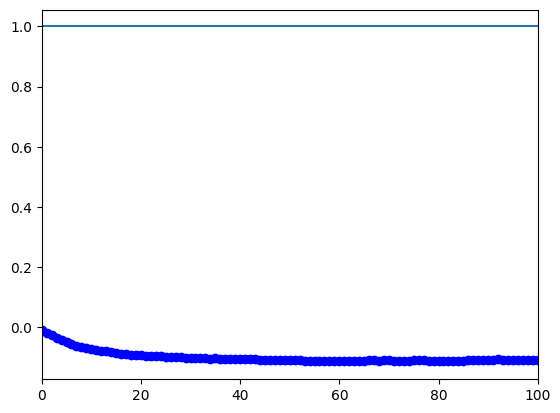

In [1037]:
plt.plot(Cd.cd_drift/alpha_to_pdrift,'bo-')
plt.plot(Cd.cd_have_lock)
plt.xlim(0,100)

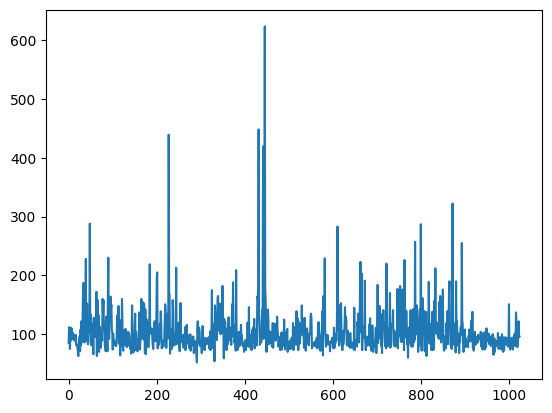

In [982]:
#plt.plot(Cd.cd_fd3/Cd.cd_sd0,'r.')   
plt.plot(Cd.cd_snr1)#/Cd.cd_sd1,'g.')   
#plt.plot(Cd.cd_fd3/Cd.cd_sd2,'b.')   
#plt.plot(Cd.cd_fd3/Cd.cd_sd3,'y.')   

#plt.xlim(-0.2,0.2)
#plt.ylim(-1e-4,1e-4)
#plt.plot(Cd.cd_drift,Cd.cd_snr0)#Cd.cd_sd0,'bo')
#plt
# .xlim(-1e-4,1e-4)
#plt.ylim(-1e-2,1e-2)

Text(0, 0.5, 'drift [ppm]')

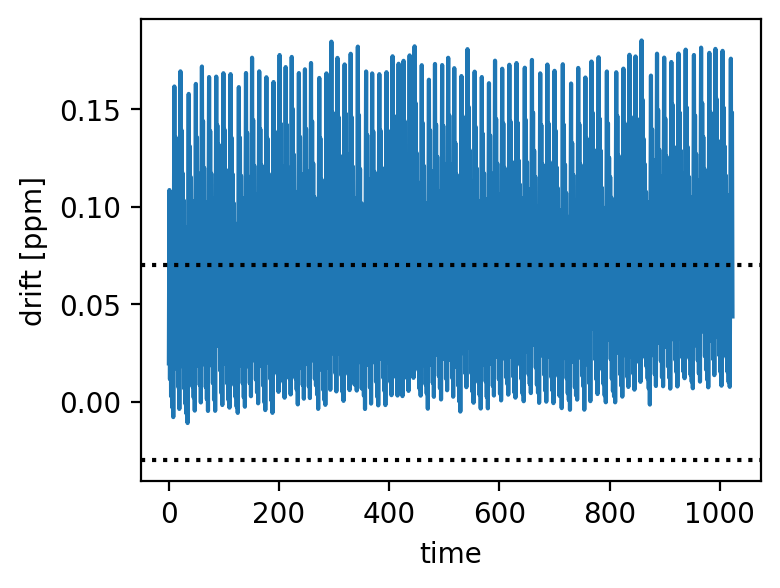

In [972]:

plt.figure(figsize=(4,3),dpi=200)
plt.plot((Cd.cd_drift[0:]/alpha_to_pdrift))
ofs = -0.03
plt.axhline(ofs,ls=':', color='k')
plt.axhline(ofs+0.1, ls=':', color='k')
plt.xlabel('time')
plt.ylabel('drift [ppm]')
#plt.plot(C.cd_snr0)
#plt.semilogy()
##plt.ylim(-1e-5,1e-5)


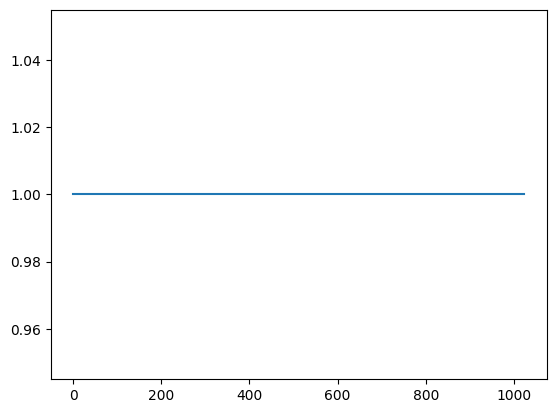

In [887]:
plt.plot(Cd.cd_have_lock)

Text(0, 0.5, 'time')

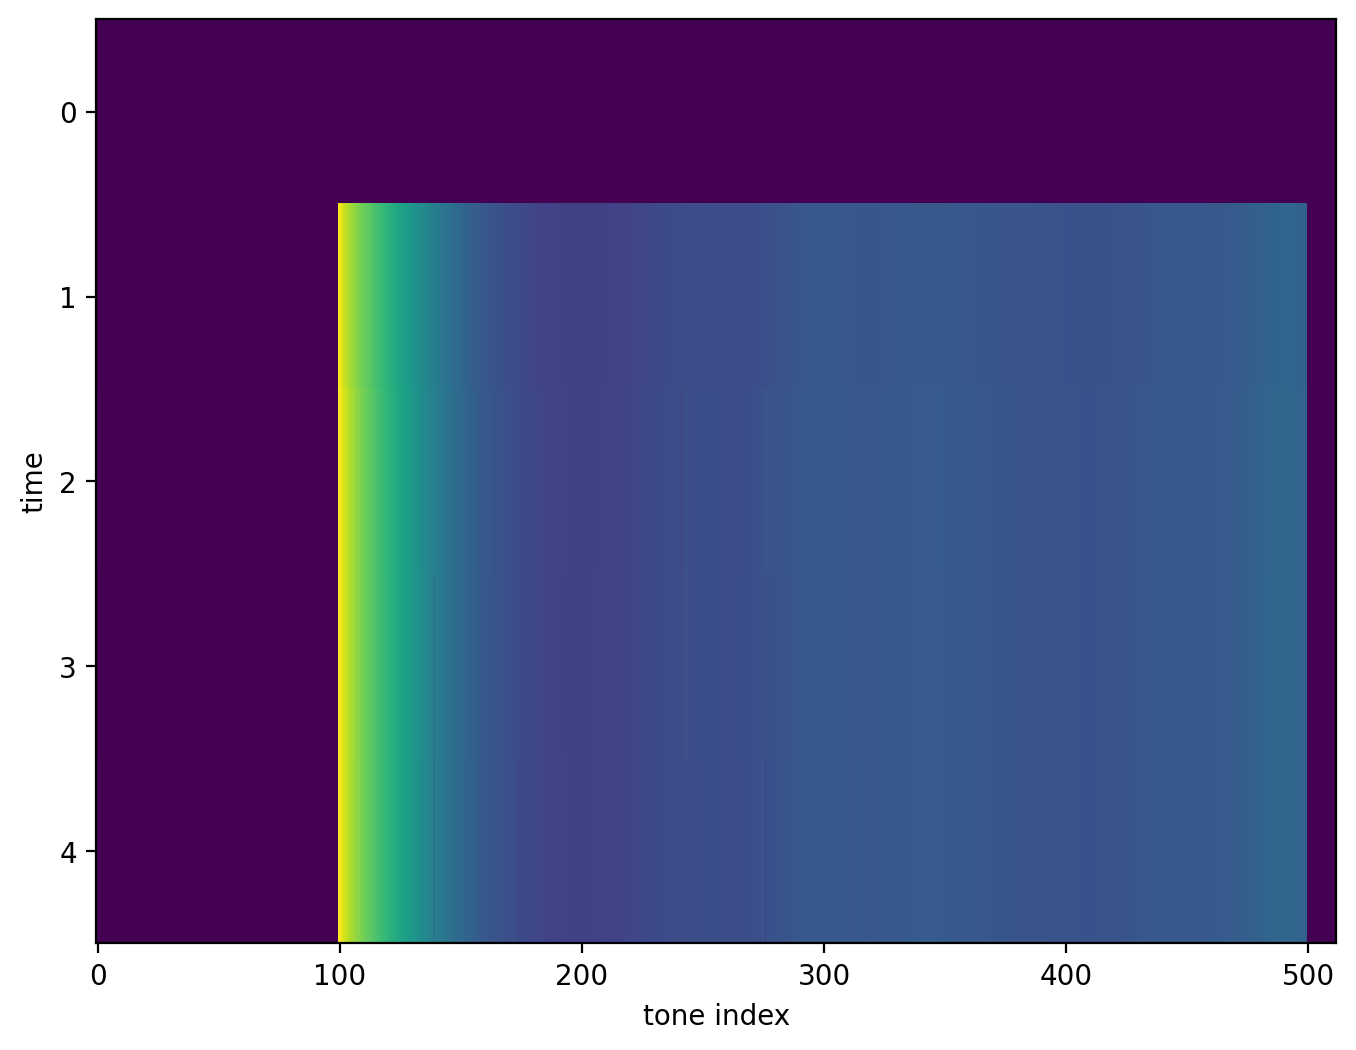

In [872]:
plt.figure(figsize=(8,6),dpi=200)
a = np.abs(C.calib_data[3,:,:])
#plt.figure(figsize=(15,8))
plt.imshow(a,aspect='auto', interpolation='nearest')
plt.xlabel('tone index')
plt.ylabel('time')
#plt.plot(a[:,100])

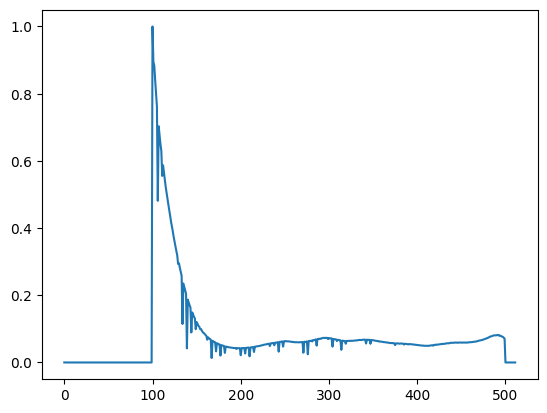

In [873]:

b = np.copy(C.spectra[2][2].data[2::4])

w=(a.mean(axis=0))**2/b
w/=w.max()
plt.plot(w)
#print(b)
#w[139]=0
#w[241]=0
#w[242]=0
#w[276]=0
#w[277]=0
#plt.plot(w)
np.savez('weights.npz',w=w)

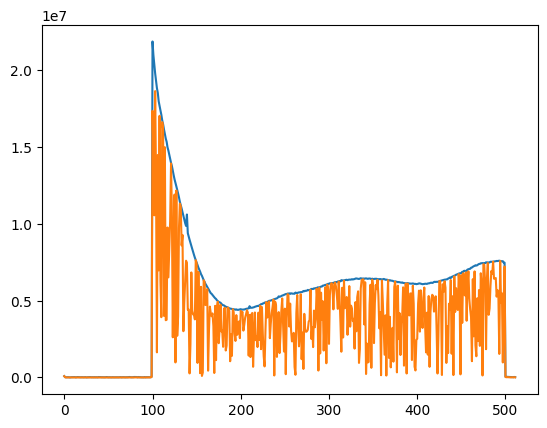

In [309]:
plt.plot(np.max(np.abs(C.calib_data[0]),axis=0))
plt.plot(np.abs(C.calib_data[0,1,:]))

IndexError: list index out of range

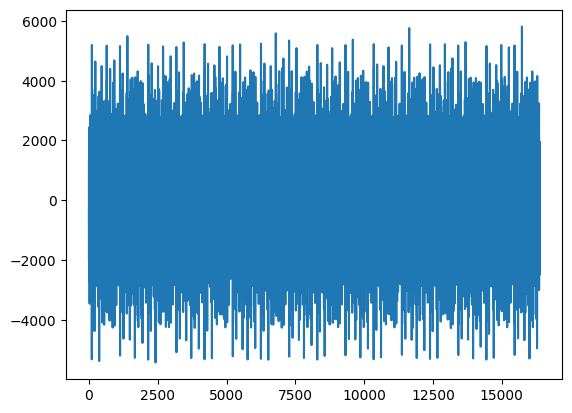

In [469]:
w=[w.waveform for w in C.waveform_packets]
plt.plot(ewf[0])
plt.plot(w[0])


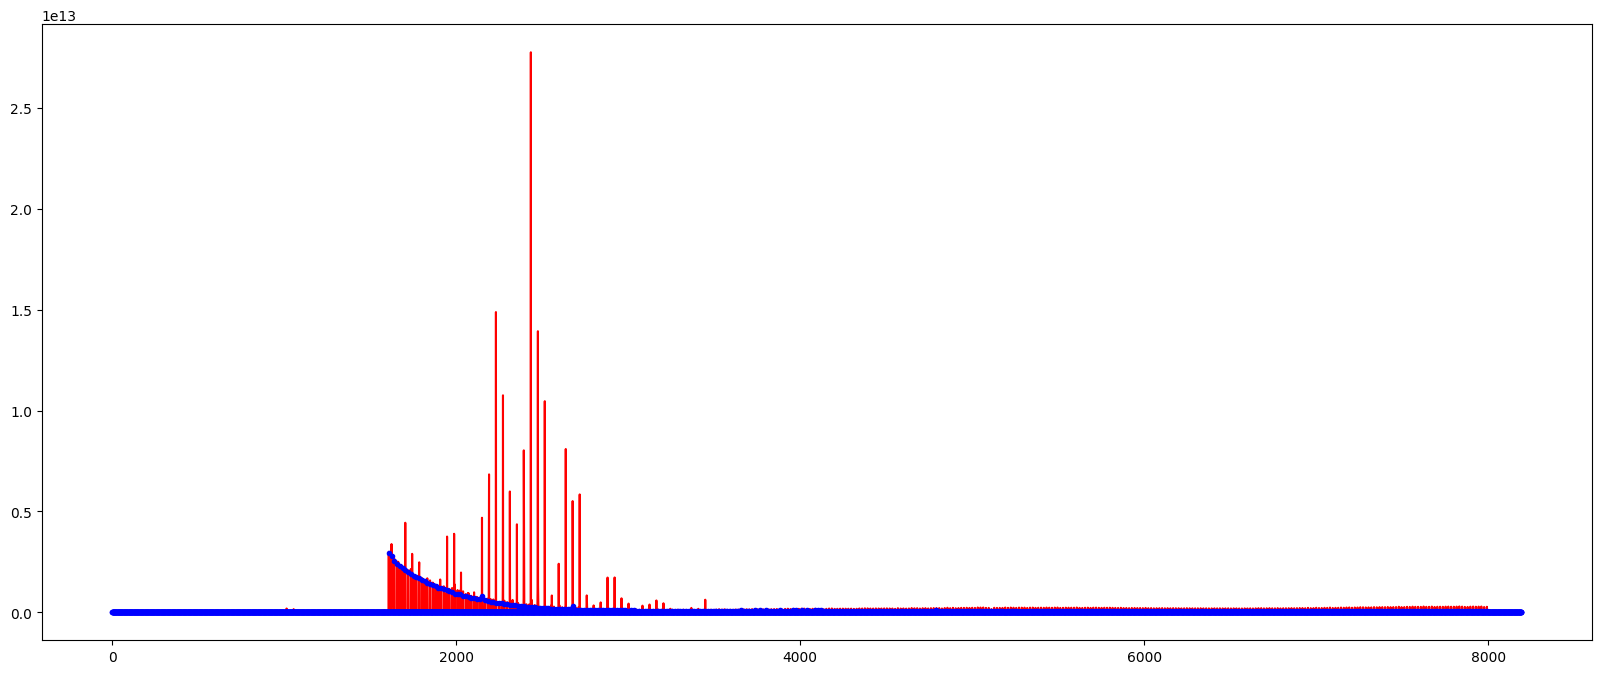

In [58]:
plt.figure(figsize=(20,8))

plt.plot(spec(w[3])*3,'r-')
plt.plot(spec(ewf[3]),'b.')
#plt.xlim(2000,2200)
#plt.semilogy()

In [13]:
for i,v in enumerate(P.registers):
    if (v!=0):
        print (f"Register {i:x}: {v}")

Register 1a: 35755457
Register 3c: 1
Register 4d: 1
Register 50: 128
Register 51: 128
Register 52: 128
Register 53: 128
Register 54: 128
Register 55: 128
Register 56: 128
Register 57: 128
Register 58: 128
Register 59: 128
Register 5a: 128
Register 5b: 128
Register 5c: 128
Register 5d: 128
Register 5e: 128
Register 5f: 128
Register 60: 128
Register 61: 128
Register 62: 128
Register 63: 128
Register 64: 128
Register 65: 128
Register 66: 128
Register 67: 128
Register 68: 128
Register 69: 128
Register 6a: 128
Register 6b: 128
Register 6c: 128
Register 6d: 128
Register 6e: 128
Register 6f: 128
Register 70: 128
Register 71: 128
Register 72: 128
Register 73: 128
Register 74: 128
Register 75: 128
Register 76: 128
Register 77: 128
Register 78: 128
Register 79: 128
Register 7a: 128
Register 7b: 128
Register 7c: 128
Register 7d: 128
Register 7e: 128
Register 7f: 128
Register 80: 128
Register 81: 128
Register 82: 128
Register 83: 128
Register 84: 128
Register 85: 128
Register 86: 128
Register 87: 

In [ ]:

#plt.plot(w[3].waveform)
##plt.plot(w[7].waveform)

In [185]:
d = np.array([S[0].data for S in C.spectra])
d.shape

(2, 2048)

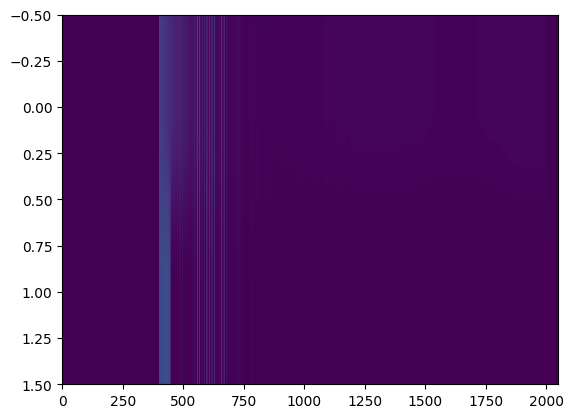

In [186]:
plt.imshow(d,aspect='auto')

(0.0, 100000000.0)

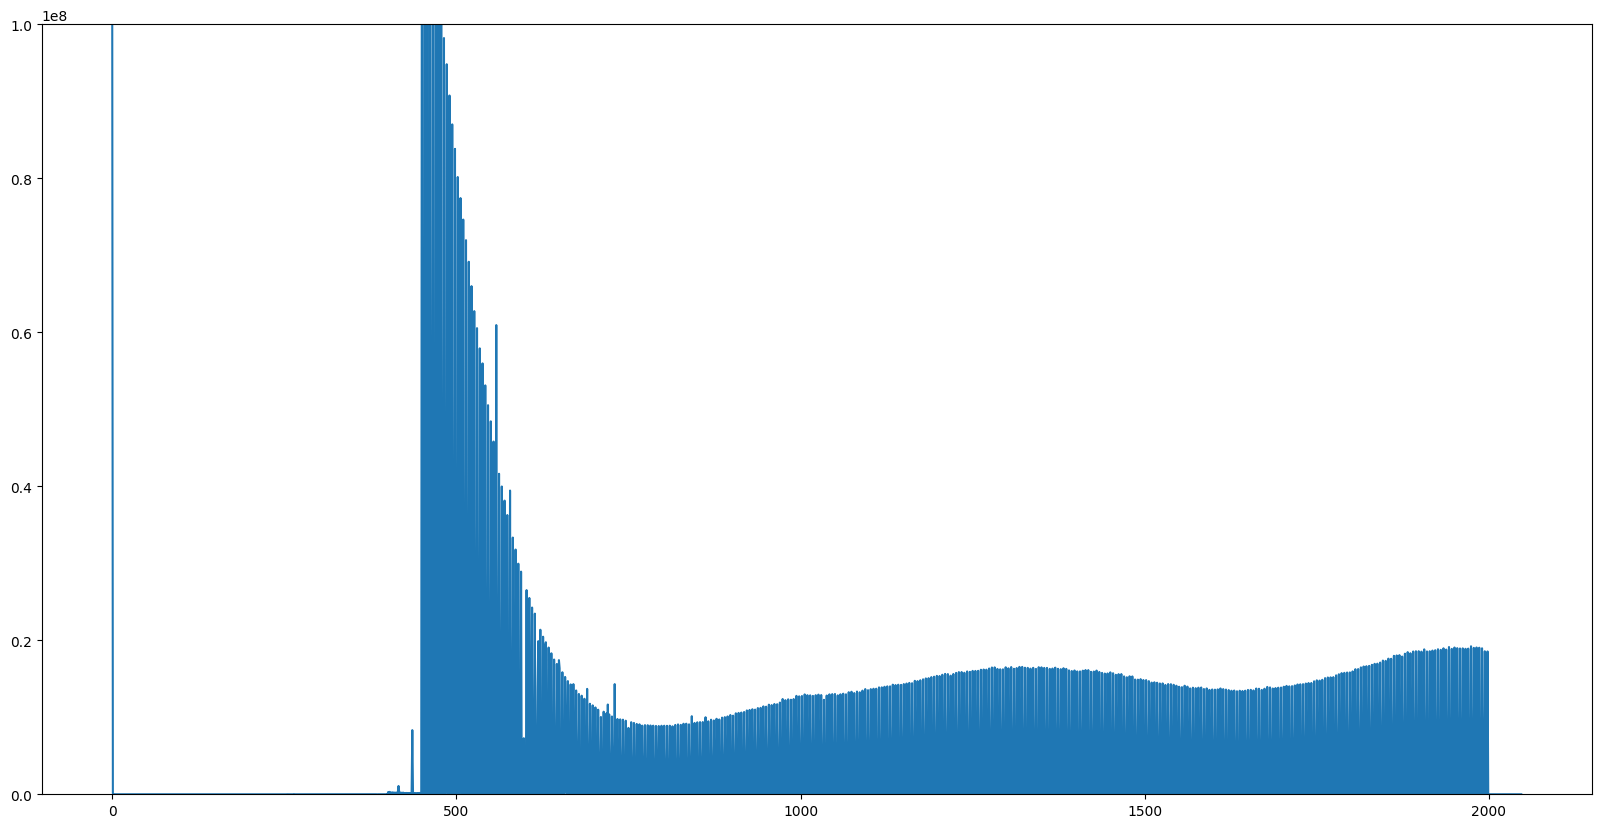

In [205]:
plt.figure(figsize=(20,10))
#
plt.plot(d[0]-d[1])
#plt.plot(d[1])
#plt.xlim(1000,2050)
plt.ylim(0,1e8)
#plt.semilogy()
